In [1]:
# Unit 3 Project
# Name: Meghan OConnell
# Date: 06/29/2023
# Due Date: 07/02/2023
# Course: CS379-2303A-01 Machine Learning

In [2]:
# Description: I chose to use a Decision Tree algorithm to determine which transactions
#    were going to be fraudulent based on the data set

In [3]:
# Importing the necessary libraries

# Pandas is how I'm reading and analyzing my data
import pandas as pd

# Matplotlib is a big resource for plotting data
import matplotlib.pyplot as plt

# I will use seaborn also for plotting data
import seaborn as sns

# Importing sklearn for the machine learning capabilities
import sklearn


In [4]:
#Reading the dataset
myData = pd.read_csv(r"C:\Users\letha\Local Documents\Jupyter\CS379\credit_fraud.csv")

#Printing first 5 rows of data to confirm read was successful
myData.head(5)

,id,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,...,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,2,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,3,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,4,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,5,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [5]:
# Checking out the data

# Checking what columns exist
print('Column breakdown:')
print(myData.columns)
print()

#Counting rows and columns
print("Columns x Rows:")
print(myData.shape)
print()

#Counting good transactions (non-fraud), versus bad transactions (fraud)
print('Good and bad transaction count:')
myData['class'].value_counts()

Column breakdown:
Index(['id', 'over_draft', 'credit_usage', 'credit_history', 'purpose',
       'current_balance', 'Average_Credit_Balance', 'employment', 'location',
       'personal_status', 'other_parties', 'residence_since',
       'property_magnitude', 'cc_age', 'other_payment_plans', 'housing',
       'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

Columns x Rows:
(1000, 22)

Good and bad transaction count:


good    700
bad     300
Name: class, dtype: int64

In [6]:
# Checking for empty rows
myData.isnull().sum()

id                        0
over_draft                0
credit_usage              0
credit_history            0
purpose                   0
current_balance           0
Average_Credit_Balance    0
employment                0
location                  0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
cc_age                    0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [7]:
# Checking data types of each column
myData.dtypes

id                         int64
over_draft                object
credit_usage               int64
credit_history            object
purpose                   object
current_balance            int64
Average_Credit_Balance    object
employment                object
location                   int64
personal_status           object
other_parties             object
residence_since            int64
property_magnitude        object
cc_age                     int64
other_payment_plans       object
housing                   object
existing_credits           int64
job                       object
num_dependents             int64
own_telephone             object
foreign_worker            object
class                     object
dtype: object

In [8]:
# Changing each of the values above to numbers
#   I made sure to show the before and after of each column
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()

print('credit_history: {}' .format(myData['credit_history'].unique())) # index 3
myData.iloc[:, 3] = labelEncoder.fit_transform(myData.iloc[:, 3].values)
print('credit_history: {}' .format(myData['credit_history'].unique())) # index 3
print()

print('purpose: {}' .format(myData['purpose'].unique())) # index 4
myData.iloc[:, 4] = labelEncoder.fit_transform(myData.iloc[:, 4].values)
print('purpose: {}' .format(myData['purpose'].unique())) # index 4
print()

print('Average_Credit_Balance: {}' .format(myData['Average_Credit_Balance'].unique())) # index 6
myData.iloc[:, 6] = labelEncoder.fit_transform(myData.iloc[:, 6].values)
print('Average_Credit_Balance: {}' .format(myData['Average_Credit_Balance'].unique())) # index 6
print()

print('employment: {}' .format(myData['employment'].unique())) # index 7
myData.iloc[:, 7] = labelEncoder.fit_transform(myData.iloc[:, 7].values)
print('employment: {}' .format(myData['employment'].unique())) # index 7
print()

print('personal_status: {}' .format(myData['personal_status'].unique())) # index 9
myData.iloc[:, 9] = labelEncoder.fit_transform(myData.iloc[:, 9].values)
print('personal_status: {}' .format(myData['personal_status'].unique())) # index 9
print()

print('other_parties: {}' .format(myData['other_parties'].unique())) # index 10
myData.iloc[:, 10] = labelEncoder.fit_transform(myData.iloc[:, 10].values)
print('other_parties: {}' .format(myData['other_parties'].unique())) # index 10
print()

print('property_magnitude: {}' .format(myData['property_magnitude'].unique())) # index 12
myData.iloc[:, 12] = labelEncoder.fit_transform(myData.iloc[:, 12].values)
print('property_magnitude: {}' .format(myData['property_magnitude'].unique())) # index 12
print()

print('other_payment_plans: {}' .format(myData['other_payment_plans'].unique())) # index 14
myData.iloc[:, 14] = labelEncoder.fit_transform(myData.iloc[:, 14].values)
print('other_payment_plans: {}' .format(myData['other_payment_plans'].unique())) # index 14
print()

print('housing: {}' .format(myData['housing'].unique())) # index 15
myData.iloc[:, 15] = labelEncoder.fit_transform(myData.iloc[:, 15].values)
print('housing: {}' .format(myData['housing'].unique())) # index 15
print()

print('job: {}' .format(myData['job'].unique())) # index 17
myData.iloc[:, 17] = labelEncoder.fit_transform(myData.iloc[:, 17].values)
print('job: {}' .format(myData['job'].unique())) # index 17
print()

print('own_telephone: {}' .format(myData['own_telephone'].unique())) # index 19
myData.iloc[:, 19] = labelEncoder.fit_transform(myData.iloc[:, 19].values)
print('own_telephone: {}' .format(myData['own_telephone'].unique())) # index 19
print()

print('foreign_worker: {}' .format(myData['foreign_worker'].unique())) # index 20
myData.iloc[:, 20] = labelEncoder.fit_transform(myData.iloc[:, 20].values)
print('foreign_worker: {}' .format(myData['foreign_worker'].unique())) # index 20
print()

print('class: {}' .format(myData['class'].unique())) # index 21
myData.iloc[:, 21] = labelEncoder.fit_transform(myData.iloc[:, 21].values)
print('class: {}' .format(myData['class'].unique())) # index 21
print()

credit_history: ['critical/other existing credit' 'existing paid' 'delayed previously'
 'no credits/all paid' 'all paid']
credit_history: [1 3 2 4 0]

purpose: ['radio/tv' 'education' 'furniture/equipment' 'new car' 'used car'
 'business' 'domestic appliance' 'repairs' 'other' 'retraining']
purpose: [6 2 3 4 9 0 1 7 5 8]

Average_Credit_Balance: ['no known savings' '<100' '500<=X<1000' '>=1000' '100<=X<500']
Average_Credit_Balance: [4 2 1 3 0]

employment: ['>=7' '1<=X<4' '4<=X<7' 'unemployed' '<1']
employment: [3 0 1 4 2]

personal_status: ['male single' 'female div/dep/mar' 'male div/sep' 'male mar/wid']
personal_status: [3 0 1 2]

other_parties: ['none' 'guarantor' 'co applicant']
other_parties: [2 1 0]

property_magnitude: ['real estate' 'life insurance' 'no known property' 'car']
property_magnitude: [3 1 2 0]

other_payment_plans: ['none' 'bank' 'stores']
other_payment_plans: [1 0 2]

housing: ['own' 'for free' 'rent']
housing: [1 0 2]

job: ['skilled' 'unskilled resident' 'high q

In [9]:
# checking my work
myData.dtypes

id                         int64
over_draft                object
credit_usage               int64
credit_history             int32
purpose                    int32
current_balance            int64
Average_Credit_Balance     int32
employment                 int32
location                   int64
personal_status            int32
other_parties              int32
residence_since            int64
property_magnitude         int32
cc_age                     int64
other_payment_plans        int32
housing                    int32
existing_credits           int64
job                        int32
num_dependents             int64
own_telephone              int32
foreign_worker             int32
class                      int32
dtype: object

In [10]:
# Removing over_draft column because I won't be using that, 
#    it's unclear what the data means

myData = myData.drop(['over_draft'], axis = 1)

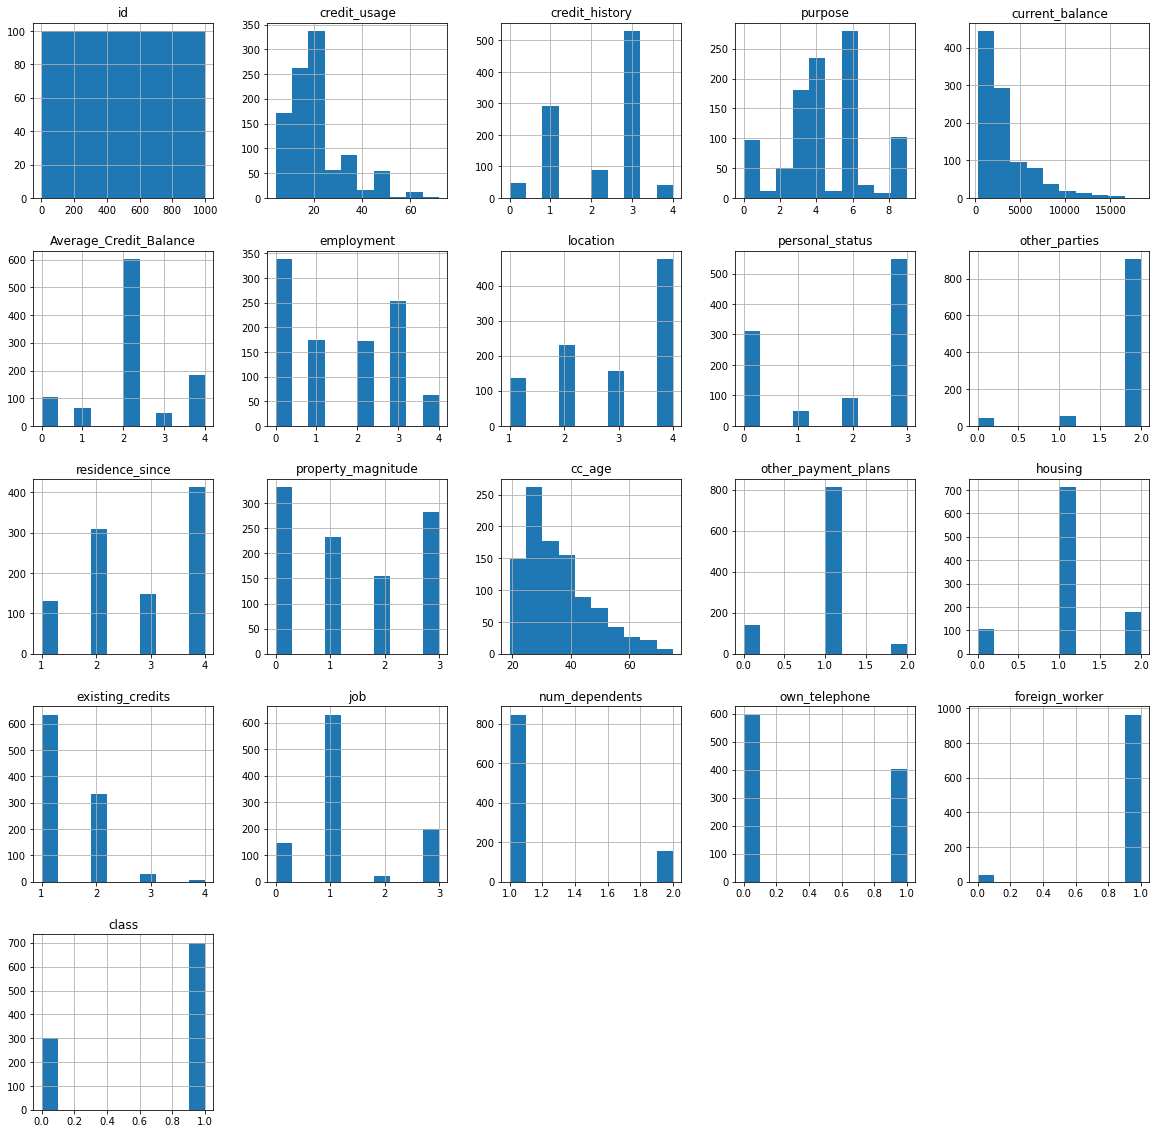

In [11]:
# Plotting a histogram of each parameter
myData.hist(figsize = (20,20))
plt.show()

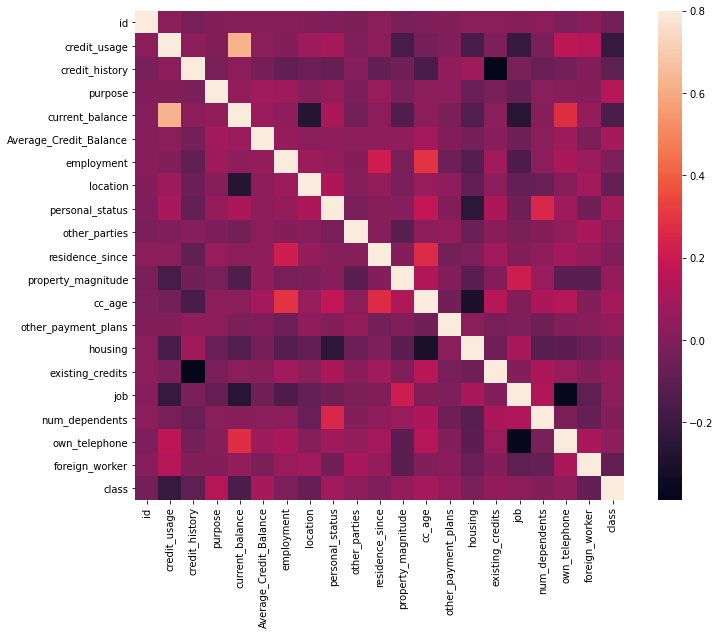

In [12]:
# Correlation matrix to show which features are most important for classification
corrmat = myData.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [13]:
# Creating variables for fraud versus not fraud
fraud = myData[myData['class'] == 0]
notFraud = myData[myData['class'] == 1]

outlier_fraction = len(fraud) / float(len(notFraud))
print(outlier_fraction)
     
print('Fraud cases: {}'.format(len(fraud)))
print('Valid cases: {}'.format(len(notFraud)))

0.42857142857142855
Fraud cases: 300
Valid cases: 700


In [14]:
myData.dtypes

id                        int64
credit_usage              int64
credit_history            int32
purpose                   int32
current_balance           int64
Average_Credit_Balance    int32
employment                int32
location                  int64
personal_status           int32
other_parties             int32
residence_since           int64
property_magnitude        int32
cc_age                    int64
other_payment_plans       int32
housing                   int32
existing_credits          int64
job                       int32
num_dependents            int64
own_telephone             int32
foreign_worker            int32
class                     int32
dtype: object

In [15]:
# Splitting the data into x and y variables for the algorithm to use and learn from

x = myData.iloc[:, 0:20].values
# Here I included index 20 because I read that this syntax is exclusive and does not include 
#    the final value, I want it to include indexes 0 - 19

y = myData.iloc[:, 20].values

In [16]:
# Splitting the data into 80% training, 20% testing using an sklearn package

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                test_size=0.2, random_state=0)

In [17]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [18]:
# Fitting the modell in the Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(x_train, y_train)

In [19]:
# Making predictions
y_pred = classifier.predict(x_test)

# Confusion matrix to check accuracy
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 22  36]
 [ 37 105]]
              precision    recall  f1-score   support

           0       0.37      0.38      0.38        58
           1       0.74      0.74      0.74       142

    accuracy                           0.64       200
   macro avg       0.56      0.56      0.56       200
weighted avg       0.64      0.64      0.64       200



In [20]:
# Summary:
#    In my algorithm, nonfraudulent transactions are represented with a 1 and fraudulent
#    transactions are represented with a 0

#    The algorithm predicted fraudulent transactions with 57% of accuracy
#    The good news is, the algorithm did predict fraudulent transactions with a 72% precision


### References
Eduonix Learning Solutions. (2018). Build A Complete Project In Machine Learning | Credit Card Fraud Detection 2019 | Eduonix [YouTube Video]. In YouTube. https://www.youtube.com/watch?v=gCWBFyFTxVU&feature=youtu.be

Elam, D. (2023, June 27). Unit 3 Live Chat: Machine Learning Applications [chat]. Retrieved from Colorado Technical University, Virtual Campus, CS379-2303A-01: https://campus.ctuonline.edu

Simplilearn. (2020, December 4). What is a Confusion Matrix in Machine Learning? Simplilearn.com; Simplilearn. https://www.simplilearn.com/tutorials/machine-learning-tutorial/confusion-matrix-machine-learning

Tracyrenee. (2021, July 22). Using KMeans clustering to predict survivors of the Titanic. Medium; MLearning.ai. https://medium.com/mlearning-ai/using-kmeans-clustering-to-predict-survivors-of-the-titanic-ae3d3e959eb8